We're going to use the sequence generator by Geoffrey Aguirre's lab (https://cfn.upenn.edu/aguirre/wiki/public:web-based_sequence_evaluator) to generate the sequence of stimuli. We have 20 stimuli (5 orientations, 4 identities) plus a blank trial, totaling 21 trials.

In [1]:
from evalseqshard import EvaluateSeqshard, vec2sim

In [2]:
import numpy as np

In [3]:
from scipy.spatial.distance import squareform

In [4]:
par = {
    'N': 21,
    'perms': 10000,
    'TrialDuration': 5,
    'BlankLength': 1,
    'doubleblanks': False,
    'target': 0,
    'numSeqs': 100
}

Use three similarity matrices to compute the efficiency of the sequence. The three matrices will be 

1. Identity
2. Orientation
3. Mirror-symmetry

In [5]:
sim_vectors = np.array([
        [0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 
         1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 
         1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 
         1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 
         1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 
         0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 
         1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 
         1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 
         1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 
         1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 
         1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
         0.0, 0.0, 0.0], 
        [1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 
         1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 
         1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 
         0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 
         0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 
         1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 
         1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 
         1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 
         1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 
         1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 
         1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 
         1.0, 1.0, 1.0], 
        [1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 
         1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 
         1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 
         0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 
         0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 
         1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 
         1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 
         1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 
         1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 
         0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 
         1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 
         1.0, 1.0, 1.0]
    ])

In [6]:
nsim_vectors = len(sim_vectors)

In [7]:
sim_mat = np.zeros((20, 20, nsim_vectors))

In [8]:
for i, vec in enumerate(sim_vectors):
    sim_mat[:, :, i] = squareform(sim_vectors[i])

In [9]:
%matplotlib inline
from matplotlib import pyplot as plt

And these are the similarity matrices

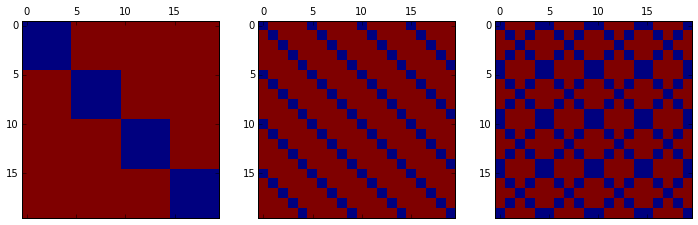

In [10]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 8))
ax1.matshow(sim_mat[:, :, 0])
ax2.matshow(sim_mat[:, :, 1])
ax3.matshow(sim_mat[:, :, 2]);

In [11]:
# set seed to get same sequence across runs
np.random.seed(485)
result = EvaluateSeqshard(par, sim_mat)

Save the results in txt files

In [12]:
# sort according to the efficiency of the first similarity matrix
sort_idx = np.argsort(result['bestEs'][0, :])[::-1]

In [13]:
efficiency = result['bestEs'][0, sort_idx].T

In [14]:
sequences = result['BestSeqs'][:, sort_idx].T

In [15]:
np.savetxt('sequences.txt', sequences, fmt='%d', delimiter=',')

In [16]:
np.savetxt('efficiency.txt', efficiency)

Each sequence is $21^2 + 1 = 442$ trials long. We need at least 630 trials. Thus we'll append two sequences that end with the same trial number. 

We are doing this twice, one for familiar and one for unfamiliar faces.

In [17]:
# first trial is equal to final trial
sequences[:, 0]

array([  7.,  16.,   2.,   2.,  18.,   5.,   9.,   1.,  11.,   1.,  15.,
        10.,   1.,   5.,   9.,   9.,  14.,  11.,  17.,   6.,  11.,   2.,
         6.,  13.,  19.,  19.,   6.,   7.,  11.,  14.,  18.,   9.,  12.,
        13.,   4.,  16.,  13.,   9.,   8.,  10.,   4.,  17.,  17.,   8.,
         7.,   9.,  18.,  10.,   6.,  15.,  13.,  10.,   3.,   3.,   9.,
        12.,   5.,   2.,  15.,  18.,  19.,  12.,  10.,  14.,  15.,  15.,
         3.,  16.,  12.,  18.,   3.,   2.,  19.,  13.,  12.,  18.,  14.,
         4.,   6.,  12.,  13.,   6.,  14.,  16.,  16.,   6.,  19.,  18.,
        16.,  11.,   6.,   1.,   6.,   1.,   5.,  20.,   1.,  13.,  10.,
         3.])

In [18]:
# first sequence starts with trial 7, find next sequence
np.where(sequences[:, 0] == 7.)

(array([ 0, 27, 44]),)

In [24]:
familiar_sequence1 = sequences[0]
familiar_sequence2 = sequences[27]

print(familiar_sequence1[:4], familiar_sequence1[-4:])
print(familiar_sequence2[:4])

(array([ 7.,  7.,  0.,  1.]), array([ 15.,   6.,   8.,   7.]))
[ 7.  7.  0.  9.]


In [26]:
# append sequence removing the first trial (we don't want a catch trial right away)
# and adding only one catch trial, not two at the end
familiar_sequence = np.hstack((familiar_sequence1[1:], familiar_sequence2[1:]))

In [27]:
len(familiar_sequence)

882

In [28]:
print(familiar_sequence[:4], familiar_sequence[-4:])

(array([  7.,   0.,   1.,  10.]), array([ 10.,   4.,  18.,   7.]))


In [29]:
np.savetxt('stim_order1.txt', familiar_sequence, fmt='%d', delimiter=',')

In [30]:
# now we do the same for the following sequence, that starts with 16
np.where(sequences[:, 0] == 16.)

(array([ 1, 35, 67, 83, 84, 88]),)

In [31]:
stranger_sequence1 = sequences[1]
stranger_sequence2 = sequences[35]

print(stranger_sequence1[:4], stranger_sequence1[-4:])
print(stranger_sequence2[:4])

(array([ 16.,  16.,   0.,   6.]), array([ 15.,   5.,   8.,  16.]))
[ 16.  16.   0.  13.]


In [32]:
# append sequence removing the first trial (we don't want a catch trial right away)
# and adding only one catch trial, not two at the end
stranger_sequence = np.hstack((stranger_sequence1[1:], stranger_sequence2[1:]))

In [33]:
len(stranger_sequence)

882

In [34]:
print(stranger_sequence[:4], stranger_sequence[-4:])

(array([ 16.,   0.,   6.,  10.]), array([ 11.,  15.,   6.,  16.]))


In [35]:
np.savetxt('stim_order2.txt', stranger_sequence, fmt='%d', delimiter=',')